In [52]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.manifold
import sklearn.datasets
import sklearn.cluster
import pandas as pd

In [70]:
data=pd.read_csv('clean2.data')

# Descripción del Data Set

El data set es un conjunto de datos que describen si un elemento es o no un 'Musk' teniendo un total de 169 atributos donde los dos primeros indican el nombre numérico y cualitativo del elemento, y el último atributo es un 1 o un 0 según si el elemento es un Musk.

In [71]:
data.keys()

Index(['MUSK-211', '211_1+1', '46', '-108', '-60', '-69', '-117', '49', '38',
       '-161',
       ...
       '-308.1', '52', '-7', '39', '126', '156', '-50.1', '-112', '96', '1.'],
      dtype='object', length=169)

In [72]:
Y = data['1.']

In [73]:
data = data.drop('1.',axis=1)
data = data.drop('MUSK-211',axis=1)
data = data.drop('211_1+1',axis=1)

In [77]:
predictors=data.keys()
n = len(data[predictors])
X = np.array(data[predictors]).reshape((n, -1))

In [78]:
print(np.shape(X),np.shape(Y))

(6597, 166) (6597,)


In [79]:
tsne = sklearn.manifold.TSNE(perplexity=20)
tsne.fit(X)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=20, random_state=None, verbose=0)

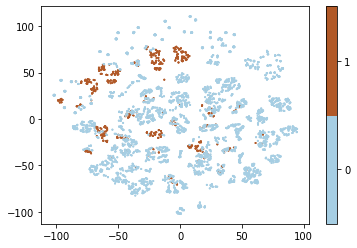

In [81]:
embedding = tsne.embedding_
plt.subplot(121)
plt.title('Sin KMeans Clusters')
plt.scatter(embedding[:,0], embedding[:,1], c=Y, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))

In [82]:
# clusters sobre los resultados de tsne
n_clusters = 2
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster

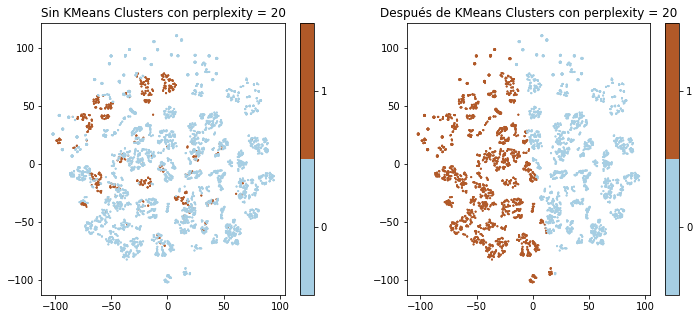

In [93]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Sin KMeans Clusters con perplexity = 20')
plt.scatter(embedding[:,0], embedding[:,1], c=Y, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))
plt.subplot(122)
plt.title('Después de KMeans Clusters con perplexity = 20')
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))

In [94]:
def f(n):
    tsne = sklearn.manifold.TSNE(perplexity=n)
    tsne.fit(X)
    embedding = tsne.embedding_
    
    # clusters sobre los resultados de tsne
    n_clusters = 2
    k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
    k_means.fit(embedding) # training
    cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
    distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster
    
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.title('Sin KMeans Clusters con perplexity = ' + str(n))
    plt.scatter(embedding[:,0], embedding[:,1], c=Y, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))
    plt.subplot(122)
    plt.title('Después de KMeans Clusters con perplexity = ' + str(n))
    plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
    plt.colorbar(boundaries=np.arange(3)-0.5).set_ticks(np.arange(2))
    linea='data_perplexity'+str(n)+'.png'
    plt.savefig(linea)

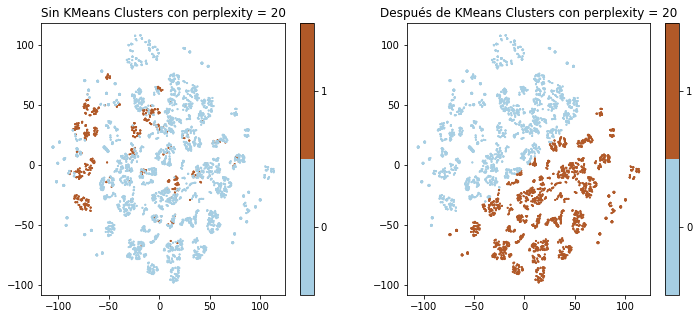

In [95]:
f(20)

In [99]:
n_p=np.arange(10,51,10)

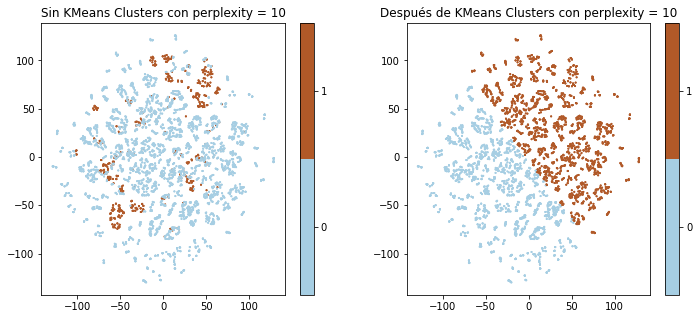

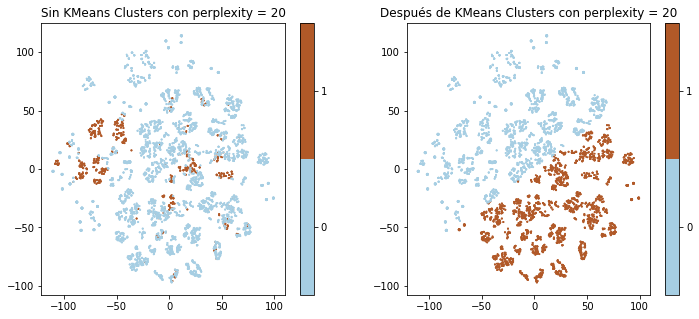

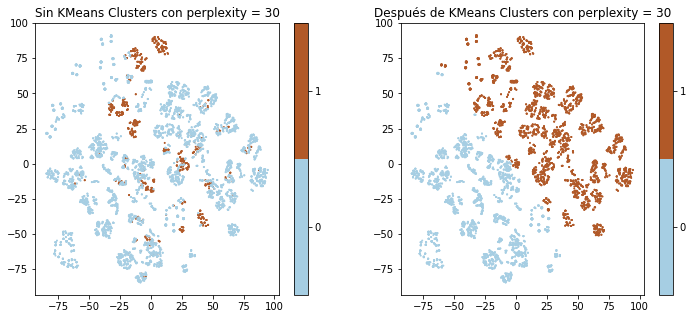

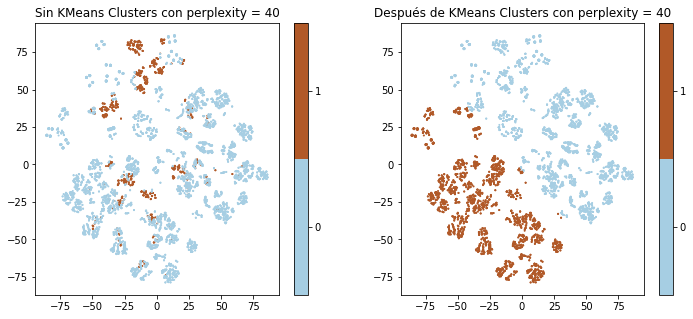

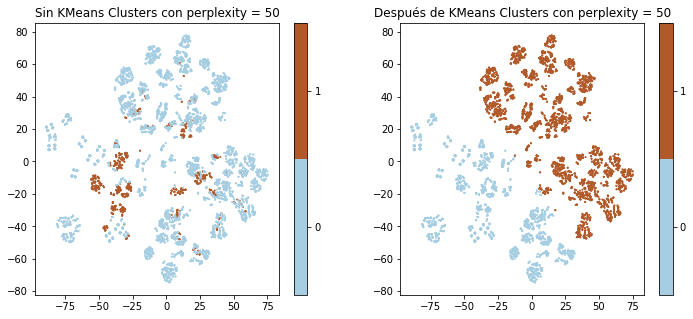

In [100]:
for i in n_p:
    f(i)

# Comentarios de la Interpretación

Tras la separación generada por el tse, no se observan agrupaciones separadas de los datos.
Sin embargo, tras aplicar el KMeans se tiene un par de clusters que tienden a ser divididos 50/50 según la región donde se encontrara una mayor densidad de puntos marrones en la nuve azúl.